# Jason Examples, Day 1

https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-1-dimensional-function-from-scratch-in-keras/

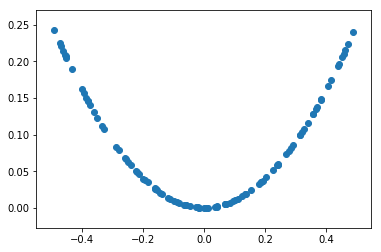

In [5]:
# example of generating random samples from X^2
from numpy.random import rand
from numpy import hstack
from matplotlib import pyplot

# generate randoms sample from x^2
def generate_samples(n=100):
	# generate random inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2 (quadratic)
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	return hstack((X1, X2))

# generate samples
data = generate_samples()
# plot samples
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()

In [3]:
# # M.Amintoosi
import os
# os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'
os.environ["PATH"] += os.pathsep + 'D:/ProgramData/Anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin/graphviz'

In [4]:
# define the discriminator model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

# define the standalone discriminator model
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# define the discriminator model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                75        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [6]:
# define and fit a discriminator model
from numpy import zeros
from numpy import ones
from numpy import hstack
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense

# define the standalone discriminator model
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# generate n real samples with class labels
def generate_real_samples(n):
	# generate inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = ones((n, 1))
	return X, y

# generate n fake samples with class labels
def generate_fake_samples(n):
	# generate inputs in [-1, 1]
	X1 = -1 + rand(n) * 2
	# generate outputs in [-1, 1]
	X2 = -1 + rand(n) * 2
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = zeros((n, 1))
	return X, y

# train the discriminator model
def train_discriminator(model, n_epochs=1000, n_batch=128):
	half_batch = int(n_batch / 2)
	# run epochs manually
	for i in range(n_epochs):
		# generate real examples
		X_real, y_real = generate_real_samples(half_batch)
		# update model
		model.train_on_batch(X_real, y_real)
		# generate fake examples
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update model
		model.train_on_batch(X_fake, y_fake)
		# evaluate the model
		_, acc_real = model.evaluate(X_real, y_real, verbose=0)
		_, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
		print(i, acc_real, acc_fake)

# define the discriminator model
model = define_discriminator()
# fit the model
train_discriminator(model)

0 0.46875 0.625
1 0.46875 0.578125
2 0.421875 0.6875
3 0.5 0.65625
4 0.390625 0.625
5 0.34375 0.59375
6 0.28125 0.625
7 0.28125 0.75
8 0.171875 0.640625
9 0.359375 0.65625
10 0.203125 0.78125
11 0.15625 0.734375
12 0.171875 0.8125
13 0.25 0.78125
14 0.140625 0.703125
15 0.25 0.734375
16 0.21875 0.640625
17 0.140625 0.765625
18 0.140625 0.796875
19 0.15625 0.75
20 0.140625 0.8125
21 0.171875 0.84375
22 0.125 0.75
23 0.109375 0.8125
24 0.09375 0.78125
25 0.203125 0.875
26 0.1875 0.8125
27 0.078125 0.84375
28 0.078125 0.859375
29 0.09375 0.734375
30 0.046875 0.859375
31 0.0625 0.921875
32 0.03125 0.84375
33 0.078125 0.828125
34 0.03125 0.890625
35 0.03125 0.875
36 0.046875 0.90625
37 0.046875 0.90625
38 0.015625 0.8125
39 0.078125 0.921875
40 0.0625 0.890625
41 0.03125 0.875
42 0.046875 0.90625
43 0.09375 0.890625
44 0.09375 0.859375
45 0.09375 0.828125
46 0.078125 0.890625
47 0.0625 0.890625
48 0.109375 0.828125
49 0.078125 0.875
50 0.109375 0.9375
51 0.0625 0.890625
52 0.15625 0.96875
5

426 0.828125 0.921875
427 0.84375 0.921875
428 0.84375 0.921875
429 0.84375 0.90625
430 0.84375 0.875
431 0.921875 0.921875
432 0.84375 0.890625
433 0.828125 0.90625
434 0.9375 0.84375
435 0.859375 0.953125
436 0.921875 0.9375
437 0.875 0.875
438 0.875 0.875
439 0.890625 0.921875
440 0.84375 0.9375
441 0.953125 0.96875
442 0.84375 0.890625
443 0.90625 0.921875
444 0.90625 0.921875
445 0.875 0.9375
446 0.953125 0.9375
447 0.890625 0.875
448 0.890625 0.859375
449 0.890625 0.8125
450 0.875 0.921875
451 0.8125 0.890625
452 0.875 0.90625
453 0.953125 0.875
454 0.9375 0.890625
455 0.90625 0.875
456 0.859375 0.921875
457 0.921875 0.90625
458 0.890625 0.890625
459 0.90625 0.984375
460 0.890625 0.9375
461 0.875 0.9375
462 0.921875 0.890625
463 0.859375 0.9375
464 0.921875 0.859375
465 0.953125 0.921875
466 0.890625 0.890625
467 0.875 0.9375
468 0.96875 0.859375
469 0.90625 0.953125
470 0.84375 0.96875
471 0.859375 0.890625
472 0.9375 0.96875
473 0.953125 0.859375
474 0.953125 0.9375
475 0.92187

892 1.0 0.859375
893 1.0 0.890625
894 1.0 0.90625
895 1.0 0.875
896 1.0 0.84375
897 1.0 0.890625
898 1.0 0.890625
899 1.0 0.90625
900 1.0 0.859375
901 1.0 0.859375
902 1.0 0.890625
903 1.0 0.890625
904 1.0 0.90625
905 1.0 0.96875
906 1.0 0.921875
907 1.0 0.828125
908 1.0 0.890625
909 1.0 0.90625
910 1.0 0.890625
911 1.0 0.875
912 1.0 0.859375
913 1.0 0.90625
914 1.0 0.890625
915 1.0 0.9375
916 1.0 0.796875
917 1.0 0.84375
918 1.0 0.84375
919 1.0 0.921875
920 1.0 0.84375
921 1.0 0.953125
922 1.0 0.875
923 1.0 0.828125
924 1.0 0.890625
925 1.0 0.890625
926 1.0 0.890625
927 1.0 0.8125
928 1.0 0.921875
929 1.0 0.84375
930 1.0 0.875
931 1.0 0.875
932 1.0 0.859375
933 1.0 0.96875
934 1.0 0.84375
935 1.0 0.859375
936 1.0 0.921875
937 1.0 0.875
938 1.0 0.8125
939 1.0 0.828125
940 1.0 0.890625
941 1.0 0.8125
942 1.0 0.84375
943 1.0 0.875
944 1.0 0.828125
945 1.0 0.890625
946 1.0 0.890625
947 1.0 0.90625
948 1.0 0.90625
949 1.0 0.921875
950 1.0 0.921875
951 1.0 0.90625
952 1.0 0.734375
953 1.0 0

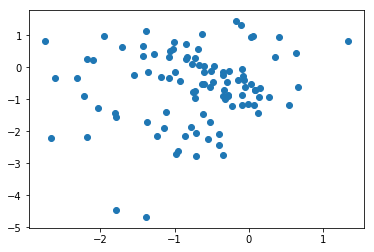

In [7]:
# define and use the generator model
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = randn(latent_dim * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input

# use the generator to generate n fake examples and plot the results
def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	# plot the results
	pyplot.scatter(X[:, 0], X[:, 1])
	pyplot.show()

# size of the latent space
latent_dim = 5
# define the discriminator model
model = define_generator(latent_dim)
# generate and plot generated samples
generate_fake_samples(model, latent_dim, 100)